
## Purpose of the Script

This script is designed to demonstrate the process of approximating a mathematical function using a neural network in TensorFlow 2. The specific function modeled is \( f(x, y) = \sin(x) \cdot \exp(y) \), which incorporates both sinusoidal and exponential components, presenting a non-trivial case for learning via neural networks.

### Key Objectives:

1. **Data Generation**: Synthesize a dataset based on the function \( f(x, y) = \sin(x) \cdot \exp(y) \) to train and test the neural network. This involves generating input pairs \((x, y)\) and their corresponding outputs.

2. **Model Architecture**: Construct a neural network with two hidden layers, each containing 128 neurons and using ReLU activation functions. This architecture is chosen to capture the complexity of the function through multiple layers of non-linear transformations.

3. **Training Process**:
    - Utilize the Adam optimizer for effective minimization of the mean squared error (MSE) loss function.
    - Implement mini-batch training with a size of 128 to balance computation efficiency and training performance.
    - Split the data into training and validation sets to monitor and prevent overfitting.

4. **Performance Evaluation**:
    - Assess the model's accuracy by comparing predictions against actual values on a test dataset.
    - Visualize the training and validation loss over epochs to understand the learning progression.

5. **Visualization**:
    - Generate plots to visually compare the predicted values from the neural network against the actual function values.
    - Include inline visualizations within a Jupyter Notebook to facilitate interactive exploration and analysis.

### Implementation Details:

The script includes detailed comments to aid understanding of each step, making it suitable for educational purposes or as a practical example in presentations on neural networks. The use of callbacks like `ModelCheckpoint` and `TensorBoard` provides insights into the training dynamics and allows for checkpointing the model at various stages.

This script is particularly useful for students and professionals interested in deep learning applications in numerical approximation, providing a hands-on example of how to approach modeling complex functions with neural networks.

Epoch 1/50
35/63 [===============>..............] - ETA: 0s - loss: 1.9229 
Epoch 1: saving model to ./checkpoints/model_epoch_01.ckpt
63/63 [==============================] - 1s 5ms/step - loss: 1.2613 - val_loss: 0.2978
Epoch 2/50
61/63 [============================>.] - ETA: 0s - loss: 0.1718
Epoch 2: saving model to ./checkpoints/model_epoch_02.ckpt
63/63 [==============================] - 0s 3ms/step - loss: 0.1696 - val_loss: 0.1064
Epoch 3/50
63/63 [==============================] - ETA: 0s - loss: 0.0795
Epoch 3: saving model to ./checkpoints/model_epoch_03.ckpt
63/63 [==============================] - 0s 3ms/step - loss: 0.0795 - val_loss: 0.0620
Epoch 4/50
61/63 [============================>.] - ETA: 0s - loss: 0.0457
Epoch 4: saving model to ./checkpoints/model_epoch_04.ckpt
63/63 [==============================] - 0s 3ms/step - loss: 0.0453 - val_loss: 0.0362
Epoch 5/50
54/63 [========================>.....] - ETA: 0s - loss: 0.0274
Epoch 5: saving model to ./checkpoints/m

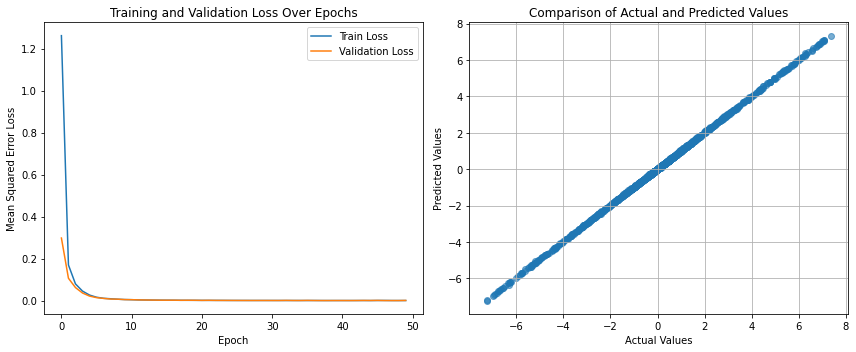

In [2]:
# Import required libraries
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard
import matplotlib.pyplot as plt
import os

# Ensure plots are displayed inline in Jupyter Notebooks
%matplotlib inline

# Setting a random seed for reproducibility of results
np.random.seed(0)
tf.random.set_seed(0)

# Function to generate synthetic data based on the function f(x, y) = sin(x) * exp(y)
def generate_data(num_samples):
    """Generate data points for training and testing the neural network model.
    
    Args:
    num_samples (int): Number of samples to generate.
    
    Returns:
    tuple: Tuple containing:
        - X (numpy.ndarray): Features (input variables x and y).
        - z (numpy.ndarray): Targets computed as sin(x) * exp(y).
    """
    x = np.random.uniform(-2, 2, num_samples)
    y = np.random.uniform(-2, 2, num_samples)
    z = np.sin(x) * np.exp(y)
    X = np.vstack((x, y)).T
    return X, z

# Generate and split the dataset
X, y = generate_data(10000)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the neural network architecture
model = Sequential([
    Dense(128, activation='relu', input_shape=(2,)),  # First hidden layer with 128 neurons and ReLU activation
    Dense(128, activation='relu'),  # Second hidden layer with 128 neurons and ReLU activation
    Dense(1)  # Output layer with one neuron (for regression)
])

# Compile the model with Adam optimizer and mean squared error loss
model.compile(optimizer='adam', loss='mse')

# Setup for saving model checkpoints and using TensorBoard
checkpoint_dir = './checkpoints'
if not os.path.exists(checkpoint_dir):
    os.makedirs(checkpoint_dir)
checkpoint_path = os.path.join(checkpoint_dir, "model_epoch_{epoch:02d}.ckpt")
checkpoint_callback = ModelCheckpoint(filepath=checkpoint_path, save_weights_only=True, verbose=1)
tensorboard_callback = TensorBoard(log_dir='./logs', histogram_freq=1)

# Train the model and capture the history
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    epochs=50, batch_size=128,
                    callbacks=[checkpoint_callback, tensorboard_callback], verbose=1)

# Evaluate the model on the test data
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Test MSE: {test_loss:.4f}')

# Plot training and validation loss over epochs
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error Loss')
plt.legend()

# Generate new data for testing the model's predictions
X_new, y_new = generate_data(2000)
y_pred = model.predict(X_new)

# Plot actual vs. predicted values
plt.subplot(1, 2, 2)
plt.scatter(y_new, y_pred, alpha=0.6)
plt.title('Comparison of Actual and Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.tight_layout()
plt.show()
